In [92]:
import pandas as pd
import matplotlib as plt

In [25]:
df = pd.read_csv("data/clean_movie.csv")

In [26]:
df_2 = df[["revenue","budget","id"]]

In [27]:
df_genre = pd.read_csv("data/genres.csv")

In [28]:
df_final = pd.merge(df_2, df_genre, on=['id'])

In [29]:
df_final["profit"] = df_final["revenue"] - df_final["budget"]

In [30]:
df_final

,revenue,budget,id,genre,profit
0,373554033.0,30000000,862,Animation,343554033.0
1,373554033.0,30000000,862,Comedy,343554033.0
2,373554033.0,30000000,862,Family,343554033.0
3,262797249.0,65000000,8844,Adventure,197797249.0
4,262797249.0,65000000,8844,Fantasy,197797249.0
...,...,...,...,...,...
89793,0.0,0,30840,Romance,0.0
89794,0.0,0,111109,Drama,0.0
89795,0.0,0,67758,Action,0.0
89796,0.0,0,67758,Drama,0.0


In [69]:
df_final_2 = df_final[(df_final.revenue !=0) & (df_final.budget!= 0)]

In [71]:
df_final_2[df_final_2["revenue"]==0]

,revenue,budget,id,genre,profit


In [72]:
df_final_2[df_final_2["budget"]==0]

,revenue,budget,id,genre,profit


In [73]:
df_final_2.isnull().sum()

revenue    0
budget     0
id         0
genre      0
profit     0
dtype: int64

In [74]:
df_final_2

,revenue,budget,id,genre,profit
0,373554033.0,30000000,862,Animation,343554033.0
1,373554033.0,30000000,862,Comedy,343554033.0
2,373554033.0,30000000,862,Family,343554033.0
3,262797249.0,65000000,8844,Adventure,197797249.0
4,262797249.0,65000000,8844,Fantasy,197797249.0
...,...,...,...,...,...
89699,1268793.0,2000000,63281,Drama,-731207.0
89716,1413000.0,5000000,63898,Action,-3587000.0
89717,1413000.0,5000000,63898,Comedy,-3587000.0
89718,1413000.0,5000000,63898,Crime,-3587000.0


<AxesSubplot: xlabel='genre'>

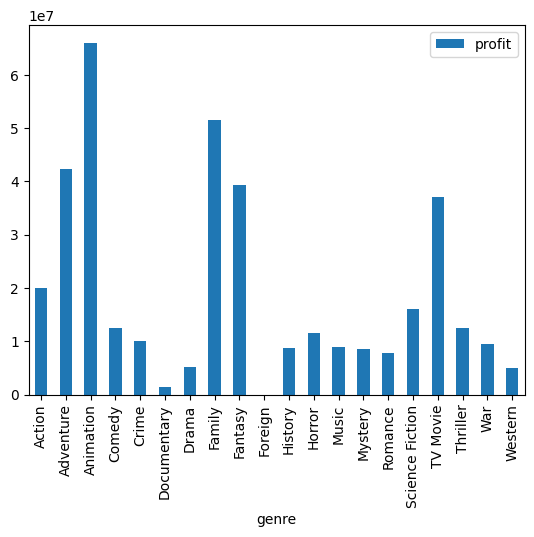

In [94]:
df_final_2.groupby("genre")["profit"].median().to_frame().plot(kind="bar")